## Beginning 

In [135]:
# Importing libraries 
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 


warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

##### Test

In [27]:
# reading the training data 
titanicTrain = pd.read_csv("/Users/Solomon/Documents/train.csv") # Directory where the file is stored
titanicTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
# reading the test data
titanicTest = pd.read_csv("/Users/Solomon/Documents/test.csv") # Directory where the file is stored
titanicTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [134]:
## Make copy of train and test data by dropping unnecessary columns
### These columns are being dropped because these variables either provide no relevance in figuring out the survival rate or there are not enough values for the variable to considered
train_data = titanicTrain.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
test_data = titanicTest.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1) 
train_data.head() # check everything looks okay


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Exploratory data analysis

In [96]:
###Trying to make plotting easier
def wrangle(dataset):
    # sex {male, female} to {0, 1}
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
    # embarked {S, C, Q} => 3 binary variables
    #embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    #dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset.drop('Embarked', axis=1)
 
train_data = wrangle(train_data)
test_data = wrangle(test_data)
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Text(0.5,1,'Distribution of Survival, (1 = Survived)')

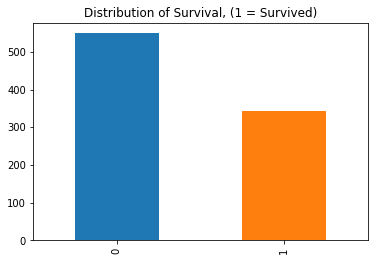

In [13]:
## Trying to find the survival rate###
train_data.Survived.value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1 = Survived)")

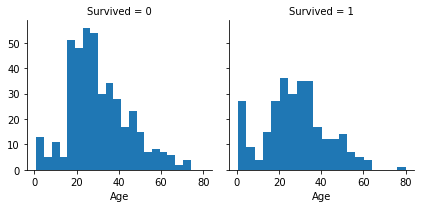

In [15]:
###Binning age by survival rate
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)


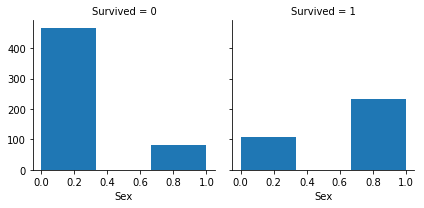

In [32]:
###Binning/Plotting sex by survival rate in order to increase accuracy
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Sex', bins=3)

Text(0.5,1,'Class Distribution')

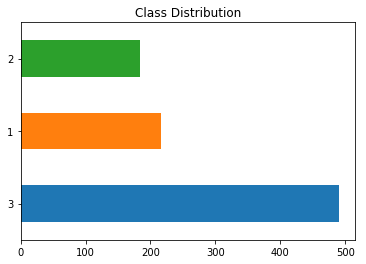

In [24]:
#Plotting class by survival rate
train_data.Pclass.value_counts().plot(kind="barh")
plt.title("Class Distribution")

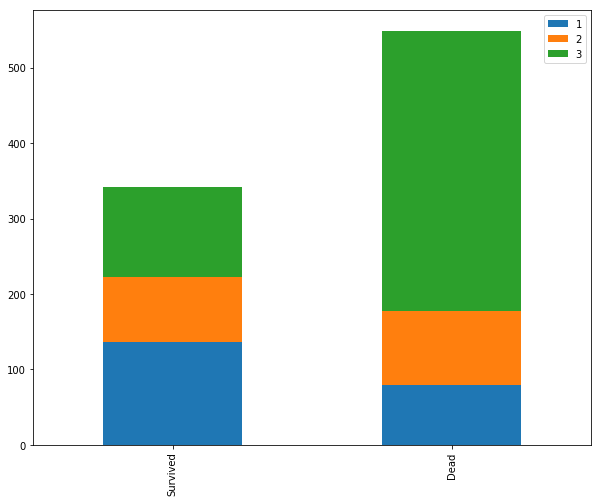

In [25]:
###Trying to determine if death rate by class is proportionally distributed
pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

Text(0.5,1,'Passengers per boarding location')

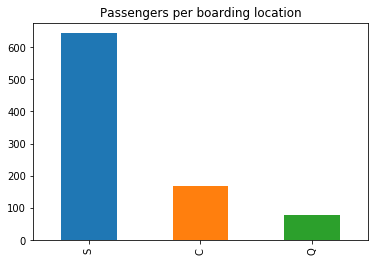

In [26]:
###Passengers per boarding location
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

In [119]:
###Correlation analysis
corr = train_data.corr()
print(corr)

          Survived    Pclass       Sex       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481  0.543351 -0.060291 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.131900 -0.414682  0.083081  0.018443 -0.549500
Sex       0.543351 -0.131900  1.000000 -0.104584  0.114631  0.245489  0.182333
Age      -0.060291 -0.414682 -0.104584  1.000000 -0.250248 -0.175708  0.123250
SibSp    -0.035322  0.083081  0.114631 -0.250248  1.000000  0.414838  0.159651
Parch     0.081629  0.018443  0.245489 -0.175708  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.182333  0.123250  0.159651  0.216225  1.000000


C:\Users\Solomon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


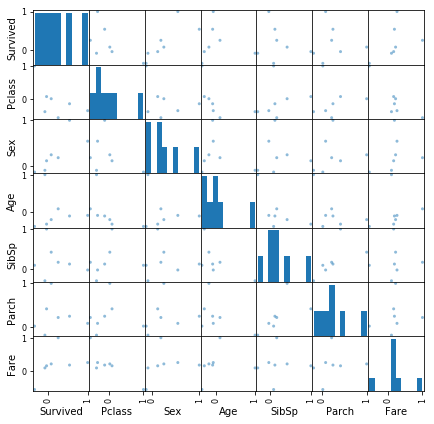

In [98]:
### Shows if the below variables have positive or negative correlations 
pd.scatter_matrix(corr,figsize=(7,7))
plt.show()

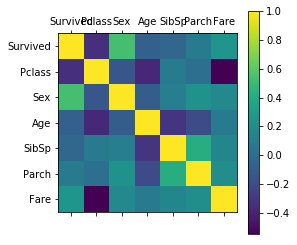

In [99]:
###Shows the strength of correlations
plt.matshow(corr)
plt.xticks(range(len(train_data.columns)), train_data.columns)
plt.yticks(range(len(train_data.columns)), train_data.columns)
plt.colorbar()
plt.show()

In [120]:
###Filling in missing values depending on class and age by computing median value
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_data[(train_data['Sex'] == i) & (train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [121]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(1), int32(2), int64(4)
memory usage: 41.8 KB
None


In [122]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int32
Age       418 non-null int32
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
dtypes: float64(1), int32(2), int64(3)
memory usage: 16.4 KB
None


In [103]:
mean_fare = 32
test_data['Fare'] = test_data['Fare'].fillna(32)

In [123]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

In [125]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int32
Age       891 non-null int32
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(1), int32(2), int64(3)
memory usage: 34.9 KB


### Training and Testing

In [108]:
from sklearn import linear_model

In [126]:
###Training the machine
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [128]:
testing = lm.predict(test_data)

In [129]:
###Testing machine
testLabels = pd.read_csv("/Users/Solomon/Documents/gendersubmission.csv")

In [130]:
testLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [131]:
testLabels = testLabels['Survived']

In [132]:
### The output dispplays the accuracy of the machine based on line of regression
lm.score(test_data,testLabels)

0.6875214842105535

In [ ]:
###Seems that fare values need to be normalized and all Embarked Values need to included to make calculatiosn more accurate.